## Welcome to Notebook 3 of the HELINA Workshop

### This notebook will read the pickle file of Table 6 of the BAIS 2013 report and create a choropleth map.

### First, we need to read in the pickle file

In [519]:
import os
import pickle
import pandas as pd
import matplotlib as plt
import geopandas as gpd

In [520]:
table6 = pd.read_pickle('table6pickle.pkl')
table6

,District,Male,Female,TotalPop
3,Gaborone,13.4,19.8,17.0
4,Francistown,20.7,27.5,24.3
5,Lobatse,13.4,20.0,17.2
6,Selebi-Phikwe,25.4,29.3,27.5
7,Orapa,9.9,20.2,15.6
8,Jwaneng,8.5,16.7,12.8
9,Sowa,13.3,26.5,19.8
10,Southern,10.6,12.8,11.8
11,Barolong,8.9,25.7,20.3
12,Ngwaketse West,10.9,24.5,18.8


In [521]:
# Rename district names to match with the shapefile. 
table6 = table6.replace({"Central-Bobonong": "Bobonong", "Central-Mahalapye": "Mahalapye", "Central-Serowe": "Serowe", 
                         "Central-Tutume": "Tutume", "Kgalagadi North": "Hukunsti", "Kgalagadi South": "Tshabong",
                        "Kweneng East": "Kweneng North", "Kweneng West": "Kweneng South", "Northeast": "Masungu",
                        "Ngamiland North": "Ngamiland East", "Ngamiland South": "Ngamiland West", "Southeast": "South East",
                        "Selebi-Phikwe": "Selibe Phikwe", "Orapa": "Lethlakane", "Southern": "Ngwaketse Central",
                        "Ngwaketse West": "Ngwaketse South"})
table6.head()

,District,Male,Female,TotalPop
3,Gaborone,13.4,19.8,17.0
4,Francistown,20.7,27.5,24.3
5,Lobatse,13.4,20.0,17.2
6,Selibe Phikwe,25.4,29.3,27.5
7,Lethlakane,9.9,20.2,15.6


In [522]:
# save as a csv.
table6.to_csv('resources/popdata.csv')

In [523]:
# check data types.
table6.dtypes

District    object
Male        object
Female      object
TotalPop    object
dtype: object

In [524]:
# load in a shapefile

fp = "resources/gadm36_BWA_2.shp"
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,BWA,Botswana,BWA.1_1,Central,None,BWA.1.1_1,Bobonong,None,None,Sub-district,Sub-district,None,BW.CE.BB,"POLYGON ((27.23352813720714 -22.1468391418457,..."
1,BWA,Botswana,BWA.1_1,Central,None,BWA.1.2_1,Lethlakane,Orapa,None,Town Council,Town Council,None,BW.CE.OR,"POLYGON ((26.2252693176269 -21.30241966247559,..."
2,BWA,Botswana,BWA.1_1,Central,None,BWA.1.3_1,Machaneng,None,None,Unknown,Unknown,None,unknown,POLYGON ((26.88739967346203 -23.59804916381836...
3,BWA,Botswana,BWA.1_1,Central,None,BWA.1.4_1,Mahalapye,None,None,Sub-district,Sub-district,None,BW.CE.MA,POLYGON ((26.88739967346203 -23.59804916381836...
4,BWA,Botswana,BWA.1_1,Central,None,BWA.1.5_1,Palapye,None,None,Sub-district,Sub-district,None,BW.CE.SR,POLYGON ((28.12284088134766 -22.55314064025868...


In [525]:
map_df.dtypes

GID_0        object
NAME_0       object
GID_1        object
NAME_1       object
NL_NAME_1    object
GID_2        object
NAME_2       object
VARNAME_2    object
NL_NAME_2    object
TYPE_2       object
ENGTYPE_2    object
CC_2         object
HASC_2       object
geometry     object
dtype: object

In [526]:
#map_df['id'] = map_df.index

In [527]:
# rename "NAME_2" columnt to "District" to match with the csv.
map_df.rename(columns={'NAME_2':'District'}, inplace=True)
map_df.head()

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,District,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,BWA,Botswana,BWA.1_1,Central,None,BWA.1.1_1,Bobonong,None,None,Sub-district,Sub-district,None,BW.CE.BB,"POLYGON ((27.23352813720714 -22.1468391418457,..."
1,BWA,Botswana,BWA.1_1,Central,None,BWA.1.2_1,Lethlakane,Orapa,None,Town Council,Town Council,None,BW.CE.OR,"POLYGON ((26.2252693176269 -21.30241966247559,..."
2,BWA,Botswana,BWA.1_1,Central,None,BWA.1.3_1,Machaneng,None,None,Unknown,Unknown,None,unknown,POLYGON ((26.88739967346203 -23.59804916381836...
3,BWA,Botswana,BWA.1_1,Central,None,BWA.1.4_1,Mahalapye,None,None,Sub-district,Sub-district,None,BW.CE.MA,POLYGON ((26.88739967346203 -23.59804916381836...
4,BWA,Botswana,BWA.1_1,Central,None,BWA.1.5_1,Palapye,None,None,Sub-district,Sub-district,None,BW.CE.SR,POLYGON ((28.12284088134766 -22.55314064025868...


In [528]:
map_df.dtypes

GID_0        object
NAME_0       object
GID_1        object
NAME_1       object
NL_NAME_1    object
GID_2        object
District     object
VARNAME_2    object
NL_NAME_2    object
TYPE_2       object
ENGTYPE_2    object
CC_2         object
HASC_2       object
geometry     object
dtype: object

In [529]:
# save shapefile as GeoJson.
map_df.to_file('resources/polygons.json', driver="GeoJSON")

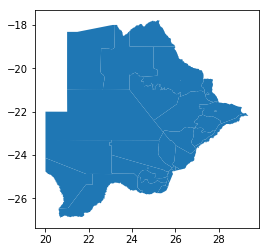

In [530]:
map_df.plot()

In [531]:
# Check if districts in csv and shapefile match. 
df_merge = pd.merge(table6, map_df, on='District', how='outer')
df_merge

,District,Male,Female,TotalPop,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,Gaborone,13.4,19.8,17.0,BWA,Botswana,BWA.4_1,Gaborone,None,BWA.4.1_1,None,None,City,City,None,BW.GB.GB,POLYGON ((25.81021690368664 -24.64698028564442...
1,Francistown,20.7,27.5,24.3,BWA,Botswana,BWA.3_1,Francistown,None,BWA.3.1_1,None,BW.FR.FR,City,City,None,unknown,POLYGON ((27.55546951293945 -21.16741752624506...
2,Lobatse,13.4,20.0,17.2,BWA,Botswana,BWA.10_1,Lobatse,None,BWA.10.1_1,None,None,Town,Town,None,BW.LB.LB,POLYGON ((25.66115379333496 -25.23774147033691...
3,Selibe Phikwe,25.4,29.3,27.5,BWA,Botswana,BWA.13_1,Selibe Phikwe,None,BWA.13.1_1,None,None,Town,Town,None,BW.SP.SL,POLYGON ((27.89134979248053 -21.96055221557612...
4,Lethlakane,9.9,20.2,15.6,BWA,Botswana,BWA.1_1,Central,None,BWA.1.2_1,Orapa,None,Town Council,Town Council,None,BW.CE.OR,"POLYGON ((26.2252693176269 -21.30241966247559,..."
5,Jwaneng,8.5,16.7,12.8,BWA,Botswana,BWA.6_1,Jwaneng,None,BWA.6.1_1,None,None,Town,Town,None,BW.JW.JW,POLYGON ((24.73080635070795 -24.62454032897949...
6,Sowa,13.3,26.5,19.8,BWA,Botswana,BWA.16_1,Sowa,None,BWA.16.1_1,None,None,Town,Town,None,BW.ST.SW,POLYGON ((26.22284889221197 -20.55301284790033...
7,Ngwaketse Central,10.6,12.8,11.8,BWA,Botswana,BWA.15_1,Southern,None,BWA.15.2_1,None,None,Unknown,Unknown,None,unknown,"POLYGON ((25.58949089050299 -25.2527503967284,..."
8,Barolong,8.9,25.7,20.3,BWA,Botswana,BWA.15_1,Southern,None,BWA.15.1_1,None,None,Sub-district,Sub-district,None,BW.SO.BR,POLYGON ((25.18077087402344 -25.76397895812988...
9,Ngwaketse South,10.9,24.5,18.8,BWA,Botswana,BWA.15_1,Southern,None,BWA.15.4_1,None,None,Unknown,Unknown,None,unknown,POLYGON ((25.17074012756353 -25.76599121093744...


In [532]:
import folium
import json

In [533]:
state_geo = r'resources/polygons.json'
table = r'resources/popdata.csv'
csvtable = pd.read_csv(table)

In [534]:
m = folium.Map(location=[-22.212136, 23.717579], zoom_start=6)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=csvtable,
    columns=['District', 'TotalPop'],
    key_on='feature.properties.District',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="HIV Prevalence Total Population",
).add_to(m)
m.save(os.path.join('resources', 'map.html'))

# HIV Prevalence Total Population (5 disticts have no data and display in dark grey). 

In [540]:
from IPython.display import IFrame

IFrame(src='resources/map.html', width=950, height=600)

In [536]:
m = folium.Map(location=[-22.212136, 23.717579], zoom_start=6)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=csvtable,
    columns=['District', 'Male'],
    key_on='feature.properties.District',
    fill_color='GnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="HIV Prevalence Male",
).add_to(m)
m.save(os.path.join('resources', 'map1.html'))

In [537]:
from IPython.display import IFrame

IFrame(src='resources/map1.html', width=950, height=600)

In [538]:
m = folium.Map(location=[-22.212136, 23.717579], zoom_start=6)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=csvtable,
    columns=['District', 'Female'],
    key_on='feature.properties.District',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="HIV Prevalence Female",
).add_to(m)
m.save(os.path.join('resources', 'map2.html'))

In [539]:
from IPython.display import IFrame

IFrame(src='resources/map2.html', width=950, height=600)

# There are 26 records in BAIS 2013 table vs 30 records in the Botswana Shapefile so there are 5 District on the map have no data and display as dark grey.